In [1]:
import os
from stable_baselines3 import DQN
import gymnasium as gym
import gym
import shimmy
import numpy as np
import matplotlib.pyplot as plt
from viper import *
from sklearn import tree

%matplotlib inline

In [2]:
algo_dt = tree.DecisionTreeClassifier
algo_rl = DQN
iter_loop = 5
iter_viper = 20
nb_data_from_nn_policy = 1_000

In [3]:
list_list_scores_cum_bot = np.zeros((iter_loop,iter_viper))
list_list_scores_cum_cart = np.zeros((iter_loop,iter_viper))
list_list_scores_cum_lun = np.zeros((iter_loop,iter_viper))

list_list_scores_ins_bot = np.zeros((iter_loop,iter_viper))
list_list_scores_ins_cart = np.zeros((iter_loop,iter_viper))
list_list_scores_ins_lun = np.zeros((iter_loop,iter_viper))

list_list_scores_rnd_bot = np.zeros((iter_loop,iter_viper))
list_list_scores_rnd_cart = np.zeros((iter_loop,iter_viper))
list_list_scores_rnd_lun = np.zeros((iter_loop,iter_viper))

In [ ]:
modes = ['cumulative', 'instant', 'uniform']
envs = ['Acrobot-v1', 'CartPole-v1', 'LunarLander-v2']

for env in envs:
    
    mdp = gym.make(env)
    path = os.path.join('policies/' + env + '.zip')

    for mode in modes:

        for i in range(iter_loop):

            list_scores = Viper(mdp, algo_dt, algo_rl, iter_viper, nb_data_from_nn_policy, mode, path_to_expert=path)
        
            if env == 'Acrobot-v1':

                if mode == 'cumulative':
                    list_list_scores_cum_bot[i] = list_scores
                elif mode == 'instant':
                    list_list_scores_ins_bot[i] = list_scores
                else:
                    list_list_scores_rnd_bot[i] = list_scores

            elif env == 'CartPole-v1':

                if mode == 'cumulative':
                    list_list_scores_cum_cart[i] = list_scores
                elif mode == 'instant':
                    list_list_scores_ins_cart[i] = list_scores
                else:
                    list_list_scores_rnd_cart[i] = list_scores

            else:

                if mode == 'cumulative':
                    list_list_scores_cum_lun[i] = list_scores
                elif mode == 'instant':
                    list_list_scores_ins_lun[i] = list_scores
                else:
                    list_list_scores_rnd_lun[i] = list_scores

list_mean_scores_cum_bot = np.mean(list_list_scores_cum_bot, axis=0)
list_mean_scores_cum_cart = np.mean(list_list_scores_cum_cart, axis=0)
list_mean_scores_cum_lun = np.mean(list_list_scores_cum_lun, axis=0)

list_mean_scores_ins_bot = np.mean(list_list_scores_ins_bot, axis=0)
list_mean_scores_ins_cart = np.mean(list_list_scores_ins_cart, axis=0)
list_mean_scores_ins_lun = np.mean(list_list_scores_ins_lun, axis=0)

list_mean_scores_rnd_bot = np.mean(list_list_scores_rnd_bot, axis=0)
list_mean_scores_rnd_cart = np.mean(list_list_scores_rnd_cart, axis=0)
list_mean_scores_rnd_lun = np.mean(list_list_scores_rnd_lun, axis=0)

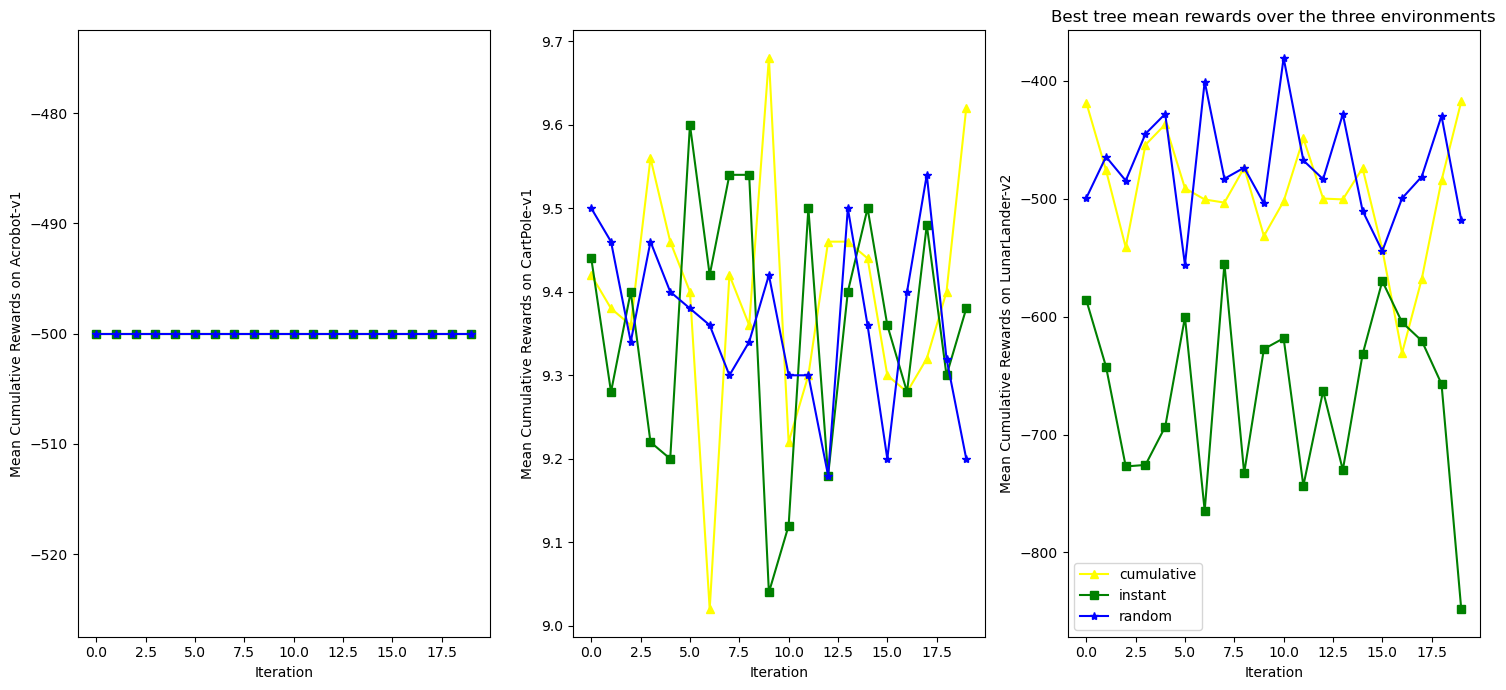

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7))

ax[0].plot(np.arange(iter_viper), list_mean_scores_cum_bot, marker='^', c='yellow', label='cumulative')
ax[0].plot(np.arange(iter_viper), list_mean_scores_ins_bot, marker='s', c='green', label='instant')
ax[0].plot(np.arange(iter_viper), list_mean_scores_rnd_bot, marker='*', c='blue', label='random')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Mean Cumulative Rewards on Acrobot-v1')

ax[1].plot(np.arange(iter_viper), list_mean_scores_cum_cart, marker='^', c='yellow', label='cumulative')
ax[1].plot(np.arange(iter_viper), list_mean_scores_ins_cart, marker='s', c='green', label='instant')
ax[1].plot(np.arange(iter_viper), list_mean_scores_rnd_cart, marker='*', c='blue', label='random')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Mean Cumulative Rewards on CartPole-v1')

ax[2].plot(np.arange(iter_viper), list_mean_scores_cum_lun, marker='^', c='yellow', label='cumulative')
ax[2].plot(np.arange(iter_viper), list_mean_scores_ins_lun, marker='s', c='green', label='instant')
ax[2].plot(np.arange(iter_viper), list_mean_scores_rnd_lun, marker='*', c='blue', label='random')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel('Mean Cumulative Rewards on LunarLander-v2')

plt.legend()
plt.title('Best tree mean rewards over the three environments')
plt.savefig('figures/best_tree_mean_rewards_20.png')
plt.tight_layout()